In [1555]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import scipy
import matplotlib.pyplot as plt

missing_values = ['?', 'NA', 'None', 'N/A']
df = pd.read_csv("auto-mpg.data", sep='\s+', na_values = missing_values)

In [1556]:
df.duplicated()
#df.mpg.duplicated()  #Duplicates in specific column
#df.drop_duplicates(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [1557]:
df.mpg.duplicated().sum()

271

In [1558]:
df.duplicated().sum()

2

In [1559]:
(~df.duplicated()).sum()

398

In [1560]:
df.loc[df.duplicated(), :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


In [1561]:
df.loc[df.duplicated(keep='first'), :]  #keep one duplicated record and delete other record(s)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


In [1562]:
x_df = df.drop_duplicates()

In [1563]:
# x_df -> dataset does not have duplicates

In [1564]:
len(x_df)

398

In [1565]:
x_df.size

3582

In [1566]:
x_df.shape   # dimension of data frame after removing duplicates

(398, 9)

In [1567]:
x_df['horsepower'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: horsepower, Length: 398, dtype: bool

In [1568]:
x_df['horsepower'].isna().sum()

6

In [1569]:
x_df['horsepower'].isnull().sum()

6

In [1570]:
x_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [1571]:
x_df.shape

(398, 9)

In [1572]:
x_df_d = x_df.dropna()

In [1573]:
x_df_d.shape

(392, 9)

In [1574]:
from sklearn.model_selection import train_test_split

x = x_df_d.iloc[:, :]
y = x_df_d.iloc[:, ]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
x_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
73,13.0,8,307.0,130.0,4098.0,14.0,72,1,chevrolet chevelle concours (sw)
148,24.0,4,90.0,75.0,2108.0,15.5,74,2,fiat 128
377,36.0,4,105.0,74.0,1980.0,15.3,82,2,volkswagen rabbit l
144,26.0,4,97.0,78.0,2300.0,14.5,74,2,opel manta
161,14.0,8,351.0,148.0,4657.0,13.5,75,1,ford ltd


In [1575]:
x_test.shape

(40, 9)

In [1576]:
x_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
79,26.0,4,96.0,69.0,2189.0,18.0,72,2,renault 12 (sw)
278,21.6,4,121.0,115.0,2795.0,15.7,78,2,saab 99gle
250,36.1,4,91.0,60.0,1800.0,16.4,78,3,honda civic cvcc
56,26.0,4,91.0,70.0,1955.0,20.5,71,1,plymouth cricket
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl


# part 2 (d)

In [1577]:
x_actaul = x_test['horsepower']

In [1578]:
x_test['x_actual'] = x_actual

In [1579]:
x_test['horsepower'] = None

In [1580]:
x_predicted = []

In [1581]:
x_predicted = x_test['horsepower'].fillna(x_train['horsepower'].mean())

In [1582]:
x_test['x_predicted'] = x_predicted #imputed

In [1583]:
x_test['horsepower'] = x_test['horsepower'].fillna(x_train['horsepower'].mean())

In [1584]:
# err = x_test['x_predicted'] - x_test['x_actual']
# x_test['err'] = err

In [1585]:
# sq_err = x_test['err'] * x_test['err']
# x_test['sq_err'] = sq_err

In [1586]:
MSE = np.square(np.subtract(x_actual,x_predicted)).mean() 
RMSE = math.sqrt(MSE)
RMSE

39.0307007964458

# part 2 (e)

In [1587]:
x_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [1588]:
x_new = x_df.drop('car_name', axis = 1)
x_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.0,2790.0,15.6,82,1
396,44.0,4,97.0,52.0,2130.0,24.6,82,2
397,32.0,4,135.0,84.0,2295.0,11.6,82,1
398,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [1589]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(x_new), columns = x_new.columns)
norm_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [1590]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputed_df = pd.DataFrame(imputer.fit_transform(norm_df),columns = norm_df.columns)
#imputed_df.isna().any()

In [1591]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_df_3 = pd.DataFrame(imputer.fit_transform(norm_df),columns = norm_df.columns)
imputed_df_3.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [1592]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_df_5 = pd.DataFrame(imputer.fit_transform(norm_df),columns = norm_df.columns)
imputed_df_5.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [1593]:
# imputer = KNNImputer(n_neighbors=3)
# X_predicted = imputer.fit_transform(X)

In [1594]:
# imputer = KNNImputer(n_neighbors=5)
# X_predicted = imputer.fit_transform(X)

In [1595]:
# X_actual = [x_test['weight']]

In [1596]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [1597]:
rmse(x_new, imputed_df_5)

mpg               24.336053
cylinders          5.191407
displacement     219.690595
horsepower       111.104063
weight          3090.029856
acceleration      15.334418
model_year        75.553303
origin             1.482644
dtype: float64

In [1599]:
rmse(x_new, imputed_df_3)

mpg               24.336053
cylinders          5.191407
displacement     219.690595
horsepower       111.103990
weight          3090.029856
acceleration      15.334418
model_year        75.553303
origin             1.482644
dtype: float64

In [1600]:
# Y = [x_test['acceleration']]

In [1601]:
# imputer = KNNImputer(n_neighbors=1)
# Y_predicted = imputer.fit_transform(Y)

In [1602]:
# imputer = KNNImputer(n_neighbors=3)
# Y_predicted = imputer.fit_transform(Y)

In [1603]:
# imputer = KNNImputer(n_neighbors=5)
# Y_predicted = imputer.fit_transform(Y)

In [1604]:
# MSE_acc = np.square(np.subtract(Y,Y_predicted)).mean() 
# RMSE_acc = math.sqrt(MSE_acc)
# RMSE_acc

In [1605]:
# Z = [x_test['displacement']]

In [1606]:
# imputer = KNNImputer(n_neighbors=1)
# Z_predicted = imputer.fit_transform(Z)

In [1607]:
# imputer = KNNImputer(n_neighbors=3)
# Z_predicted = imputer.fit_transform(Z)

In [1608]:
# imputer = KNNImputer(n_neighbors=5)
# Z_predicted = imputer.fit_transform(Z)

In [1609]:
# MSE_disp = np.square(np.subtract(Z,Z_predicted)).mean() 
# RMSE_disp = math.sqrt(MSE_disp)
# RMSE_disp

In [1610]:
# W = [x_test['mpg']]

In [1611]:
# imputer = KNNImputer(n_neighbors=1)
# W_predicted = imputer.fit_transform(W)

In [1612]:
# imputer = KNNImputer(n_neighbors=3)
# W_predicted = imputer.fit_transform(W)

In [1613]:
# imputer = KNNImputer(n_neighbors=5)
# W_predicted = imputer.fit_transform(W)

In [1614]:
# MSE_mpg = np.square(np.subtract(W,W_predicted)).mean() 
# RMSE_mpg = math.sqrt(MSE_disp)
# RMSE_mpg

# part 2 (f)

In [1615]:
x_df['horsepower'].fillna(x_df['horsepower'].mean())
#x_df

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
395     86.0
396     52.0
397     84.0
398     79.0
399     82.0
Name: horsepower, Length: 398, dtype: float64

# part 3 (a)

In [1616]:
#skewness
from scipy.stats import skew 
skew(x_df['mpg'], axis=0, bias=True)   #the distribution is positively skewed

0.45534192556309266

In [1617]:
#kurtosis
from scipy.stats import kurtosis
kurtosis(x_df['mpg'], axis=0, bias=True)     #the distribution has more values in the tails compared to a normal distribution.

-0.5194245405990445

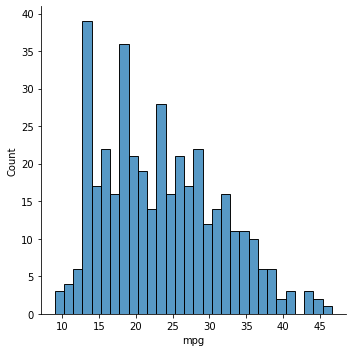

In [1618]:
# Draw the histogram using the seaborn distplot function
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x_df['mpg'],bins=30,kde=False)
plt.show()

# part 3 (b)

In [1619]:
#Identify outliers of mpg using Inter Quartile Range (IQR) approach and impute them with min and max values appropriately. 

In [1620]:
x_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
397,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [1621]:
#importing packages
import matplotlib.pyplot as plt
%matplotlib inline

In [1622]:
#lower and upperbound function
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(x_df['mpg'])

In [1623]:
lowerbound

0.25

In [1624]:
upperbound

46.25

In [1625]:
outliers = x_df[(x_df['mpg'] < lowerbound) | (x_df['mpg'] > upperbound)]
outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
324,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda glc


In [1626]:
# boxplot
# histogram
# scattered plot

In [1627]:
# fig, ax = plt.subplots(figsize=(12,6))
# ax.scatter(x_df['mpg'], x_df['acceleration'])
# ax.set_xlabel('Income of applicants in USD')
# ax.set_ylabel('Loan amount applied for in USD')
# plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

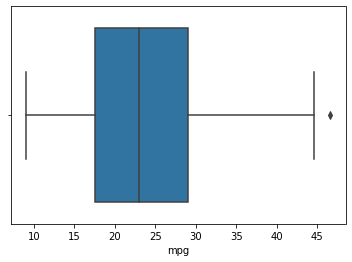

In [1628]:
sns.boxplot(x_df['mpg'])

<AxesSubplot:>

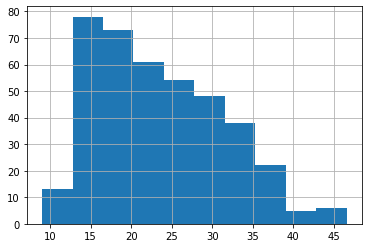

In [1629]:
x_df['mpg'].hist()

In [1630]:
#imputing with min max values
# df.loc[x_df['mpg'] > outliers.loc['mpg']['upperbound'], x_df['mpg']] = outliers.loc['mpg']['upperbound']
# df.loc[x_df['mpg'] < outliers.loc['mpg']['lowerbound'], x_df['mpg']] = outliers.loc['mpg']['lowerbound']

In [1631]:
lower_limit = x_df['mpg'].quantile(0.03)  
upper_limit = x_df['mpg'].quantile(0.97)

print(lower_limit)
print(upper_limit)

12.0
38.180999999999976


In [1632]:
# x_df['mpg_chapped'] = np.where(x_df['mpg']> upper_limit, upper_limit,
#                         np.where(x_df['mpg']< lower_limit, lower_limit,
#                         x_df['mpg']))

In [1633]:
# sns.boxplot( y="mpg_chapped", data=x_df)

# part 3 (c)

In [1634]:
#Transform mpg column using loge (x+1) formula to make the mpg values follow the normal distribution. 

In [1635]:
x_df['mpg'].tail(80)

320    29.8
321    31.3
322    37.0
323    32.2
324    46.6
       ... 
395    27.0
396    44.0
397    32.0
398    28.0
399    31.0
Name: mpg, Length: 80, dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

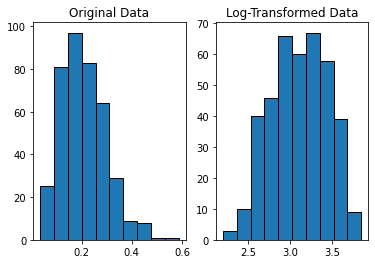

In [1636]:
import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
# data = np.random.beta(a=4, b=15, size=398)

#create log-transformed data
data_log = np.log(x_df['mpg'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

# part 3 (d)

In [1637]:
# Use a QQ-plot to show that loge (x+1) is a better transformation for mpg. Find the kurtosis and skewness of mpg after the transformation. 

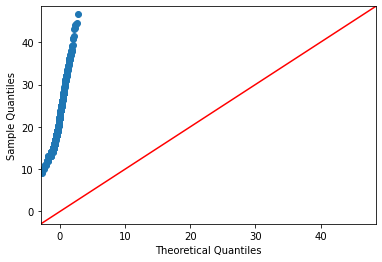

In [1638]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig_qq = sm.qqplot(x_df['mpg'], line='45')
plt.show()

In [1639]:
#kurtosis
from scipy.stats import kurtosis
kurtosis(x_df['mpg'], axis=0, bias=True)

-0.5194245405990445

In [1640]:
#skewness
from scipy.stats import skew 
skew(x_df['mpg'], axis=0, bias=True)

0.45534192556309266

# part 3 (e)

In [1641]:
#Similarly detect and correct outliers in the weight, displacement, horsepower and acceleration columns 

In [1642]:
lowerbound_weight, upperbound_weight = outlier_treatment(x_df['weight'])
print(lowerbound_weight)
print(upperbound_weight)

147.375
5684.375


In [1643]:
x_df[(x_df['weight'] < lowerbound_weight) | (x_df['weight'] > upperbound_weight)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [1644]:
lowerbound_disp, upperbound_disp = outlier_treatment(x_df['displacement'])
print(lowerbound_disp)
print(upperbound_disp)

-132.375
498.625


In [1645]:
x_df[(x_df['displacement'] < lowerbound_disp) | (x_df['displacement'] > upperbound_disp)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [1646]:
lowerbound_hp, upperbound_hp = outlier_treatment(x_df['horsepower'])
print(lowerbound_hp)
print(upperbound_hp)

nan
nan


In [1647]:
x_df[(x_df['horsepower'] < lowerbound_hp) | (x_df['horsepower'] > upperbound_hp)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [1648]:
lowerbound_acc, upperbound_acc = outlier_treatment(x_df['acceleration'])
print(lowerbound_acc)
print(upperbound_acc)

8.8
22.2


In [1649]:
x_df[(x_df['acceleration'] < lowerbound_acc) | (x_df['acceleration'] > upperbound_acc)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160.0,3609.0,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54.0,2254.0,23.5,72,2,volkswagen type 3
301,27.2,4,141.0,71.0,3190.0,24.8,79,2,peugeot 504
328,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)
396,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup


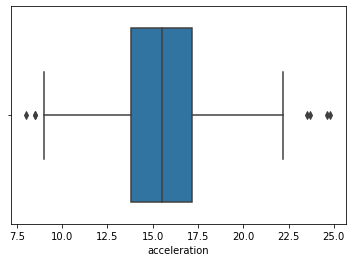

In [1650]:
sns.boxplot(x = x_df['acceleration'])
plt.show()

In [1651]:
#winsorise method
from scipy.stats.mstats import winsorize

In [1652]:
lowerbound_acc

8.8

In [1653]:
upperbound_acc

22.2

In [1654]:
x_df['acceleration'].quantile(0.01)

9.485

In [1655]:
x_df['acceleration'].quantile(0.98)

21.806

In [1656]:
df_table_win = winsorize(x_df['acceleration'],(0.01,0.02))

<AxesSubplot:>

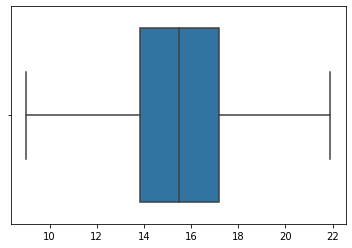

In [1657]:
sns.boxplot(x = df_table_win)

In [1658]:
df_table_win = pd.DataFrame(df_table_win)

In [1659]:
df_table_win.describe()

,0
count,398.000000
mean,15.548492
std,2.677161
min,9.000000
25%,13.825000
50%,15.500000
75%,17.175000
max,21.900000


In [1660]:
x_df['acceleration'].head(10)

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
5    10.0
6     9.0
7     8.5
8    10.0
9     8.5
Name: acceleration, dtype: float64

# part 3 (f)

In [1661]:
#Display the correlation matrix using the seaborn heatmap function between continuous 
#variables; mpg, horsepower, weight, displacement, and acceleration. 

In [1662]:
import seaborn as sns

In [1664]:
x_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

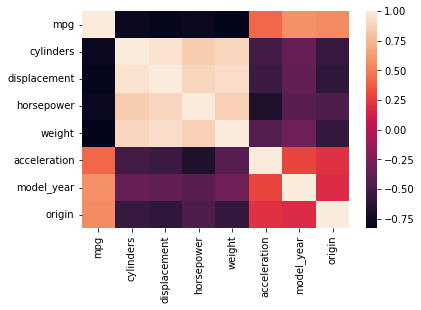

In [1665]:
sns.heatmap(x_df.corr())